In [50]:
# How expensive is it to maintain or improve your standing in German football?
# Attempt at model building from 2017/18 and 2018/19 results and the finances from the 2017/18 season

# x0
#
points_2017_18 = { "Bayern":      84, \
                   "Schalke":     63, \
                   "Hoffenheim":  55, \
                   "Dortmund":    55, \
                   "Leverkusen":  55, \
                   "Leipzig":     53, \
                   "Stuttgart":   51, \
                   "Frankfurt":   49, \
                   "M'gladbach":  47, \
                   "Hertha":      43, \
                   "Bremen":      42, \
                   "Augsburg":    41, \
                   "Hannover":    39, \
                   "Mainz":       36, \
                   "Freiburg":    36, \
                   "Wolfsburg":   33 }  # Hamburg (31) and Köln (22) relegated

# y
#
points_2018_19 = { "Bayern":      78, \
                   "Dortmund":    76, \
                   "Leipzig":     66, \
                   "Leverkusen":  58, \
                   "M'gladbach":  55, \
                   "Wolfsburg":   55, \
                   "Frankfurt":   54, \
                   "Bremen":      53, \
                   "Hoffenheim":  51, \
                   "Hertha":      43, \
                   "Mainz":       43, \
                   "Freiburg":    36, \
                   "Schalke":     33, \
                   "Augsburg":    32, \
                   "Stuttgart":   28, \
                   "Hannover":    21 }  # Düsseldorf (44) and Nürnberg (19) new in this season

# For the below, source of data: Deutsche Fußball Liga,
# URL: https://media.dfl.de/sites/2/2019/05/Clubs-der-Bundesliga-2019-20-Ver%C3%B6ffentlichung-der-Angaben-gem%C3%A4%C3%9F-%C2%A78-Nr-6-j-und-k-LO.pdf
# and https://media.dfl.de/sites/2/2019/05/Clubs-der-2.-Bundesliga-2019-20-Ver%C3%B6ffentlichung-der-Angaben-gem%C3%A4%C3%9F-%C2%A78-Nr-6-j-und-k-LO.pdf

balance_2017_18 = { "Augsburg":   123073000, \
                    "Bayern":     736764000, \
                    "Bremen":      52078000, \
                    "Dortmund":   478331000, \
                    "Frankfurt":   97530000, \
                    "Freiburg":    97021000, \
                    "Hannover":    96769000, \
                    "Hertha":      47567000, \
                    "Hoffenheim": 260481000, \
                    "Leipzig":    247316000, \
                    "Leverkusen": 311343000, \
                    "Mainz":       75826000, \
                    "M'gladbach": 214949000, \
                    "Schalke":    273603000, \
                    "Stuttgart":  130715000, \
                    "Wolfsburg":  268504000 }
total_bundesliga_funds = sum(balance_2017_18.values())

# x1
#
relative_balance_2017_18 = {key: val/sum(balance_2017_18.values()) \
                            for key, val in balance_2017_18.items()}

training = ["Augsburg", "Bayern",   "Bremen",  "Dortmund",  "Frankfurt", \
            "Freiburg", "Hannover", "Hertha", "Hoffenheim", "Leipzig" ]
validation = ["Leverkusen", "Mainz", "M'gladbach"]
test = ["Schalke", "Stuttgart", "Wolfsburg"]

In [51]:
# *** MODEL 0 ***
#
# Average from training data, no correlation between y and x0 and/or x1 assumed

y_training_mean = sum([points_2018_19[club] for club in training]) / len(training)
print("y_training_mean:", y_training_mean)

y_training_mean: 51.0


In [53]:
# *** MODEL I ***

# First, only correlate 2017/18 to 2018/19 results, using statsmodels
#
# Linear regression y = a*x0 + b
#
import numpy as np
import statsmodels.api as sm

x0_array = sm.add_constant(np.asarray([points_2017_18[club] for club in training]))
y_array = np.asarray([points_2018_19[club] for club in training])
print("x0_array:\n", x0_array)
print("\ny_array:\n", y_array)

fit = sm.OLS(y_array, x0_array).fit()
print("\n***\nRegression:\n", fit.summary())

x0_array:
 [[ 1. 41.]
 [ 1. 84.]
 [ 1. 42.]
 [ 1. 55.]
 [ 1. 49.]
 [ 1. 36.]
 [ 1. 39.]
 [ 1. 43.]
 [ 1. 55.]
 [ 1. 53.]]

y_array:
 [32 78 53 76 54 36 21 43 51 66]

***
Regression:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     13.14
Date:                Tue, 07 Dec 2021   Prob (F-statistic):            0.00674
Time:                        10:33:25   Log-Likelihood:                -38.081
No. Observations:                  10   AIC:                             80.16
Df Residuals:                       8   BIC:                             80.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    st

/home/horsch/.conda/envs/local/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<AxesSubplot:xlabel='points in season 2017/18', ylabel='points in season 2018/19'>

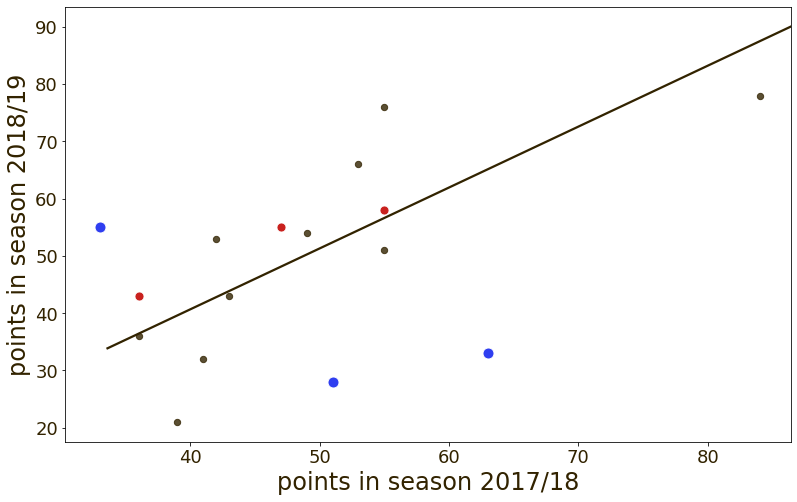

In [54]:
# *** MODEL I ***

# Correlate 2017/18 to 2018/19 results graphically, using seaborn
#
# Linear regression y = a*x0 + b
#
import seaborn as sbn
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("points in season 2017/18", fontsize=24, color="#322300")
ax.set_ylabel("points in season 2018/19", fontsize=24, color="#322300")

sbn.regplot(x=[points_2017_18[club] for club in training], \
            y=[points_2018_19[club] for club in training], \
            color='#322300', order=1, scatter_kws={'s':40}, ci=None, truncate=False)  # black for training data
sbn.scatterplot(x=[points_2017_18[club] for club in validation], \
                y=[points_2018_19[club] for club in validation], color="#c9211e", s=80)  # red for val data
sbn.scatterplot(x=[points_2017_18[club] for club in test], \
                y=[points_2018_19[club] for club in test], color="#2f3ef0", s=120)  # blue for test data

In [57]:
# *** MODEL II ***

# Correlate 2017/18 funding to 2018/19 results, using statsmodels
#
# Linear regression y = a*x1 + b
#
import numpy as np
import statsmodels.api as sm

x1_array = sm.add_constant(np.asarray([relative_balance_2017_18[club] for club in training]))
y_array = np.asarray([points_2018_19[club] for club in training])
print("x1_array:\n", x1_array)
print("\ny_array:\n", y_array)

fit = sm.OLS(y_array, x1_array).fit()
print("\n***\nRegression:\n", fit.summary())

x1_array:
 [[1.         0.03504486]
 [1.         0.2097925 ]
 [1.         0.01482914]
 [1.         0.13620407]
 [1.         0.02777153]
 [1.         0.02762659]
 [1.         0.02755484]
 [1.         0.01354464]
 [1.         0.0741716 ]
 [1.         0.07042288]]

y_array:
 [32 78 53 76 54 36 21 43 51 66]

***
Regression:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     11.59
Date:                Tue, 07 Dec 2021   Prob (F-statistic):            0.00930
Time:                        10:34:03   Log-Likelihood:                -38.461
No. Observations:                  10   AIC:                             80.92
Df Residuals:                       8   BIC:                             81.53
Df Model:                           1        

/home/horsch/.conda/envs/local/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<AxesSubplot:xlabel='fraction of total funds in season 2017/18', ylabel='points in season 2018/19'>

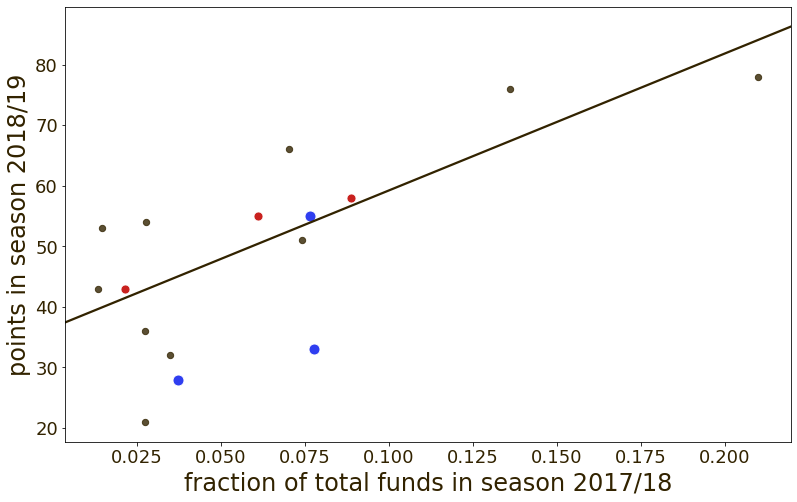

In [59]:
# *** MODEL II ***

# Correlate 2017/18 funding to 2018/19 results graphically, using seaborn
#
# Linear regression y = a*x1 + b
#
import seaborn as sbn
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("fraction of total funds in season 2017/18", fontsize=24, color="#322300")
ax.set_ylabel("points in season 2018/19", fontsize=24, color="#322300")

sbn.regplot(x=[relative_balance_2017_18[club] for club in training],\
            y=[points_2018_19[club] for club in training], \
            color='#322300', order=1, scatter_kws={'s':40}, ci=None, truncate=False)  # black for training data
sbn.scatterplot(x=[relative_balance_2017_18[club] for club in validation], \
                y=[points_2018_19[club] for club in validation], color="#c9211e", s=80)  # red for val data
sbn.scatterplot(x=[relative_balance_2017_18[club] for club in test], \
                y=[points_2018_19[club] for club in test], color="#2f3ef0", s=120)  # blue for test data

In [60]:
# *** MODEL III ***

# Correlate 2017/18 results (x0) and 2017/18 funding (x1) to 2018/19 results (y), using statsmodels
#
# Linear regression y = a*x0 + b*x1 + c
#
import numpy as np
import statsmodels.api as sm

x_array = np.asarray( [[1, points_2017_18[club], relative_balance_2017_18[club]] for club in training] )
y_array = np.asarray( [points_2018_19[club] for club in training] )
print("x_array:\n", x_array)
print("\ny_array:\n", y_array)

fit = sm.OLS(y_array, x_array).fit()
print("\n***\nRegression:\n", fit.summary())

x_array:
 [[1.00000000e+00 4.10000000e+01 3.50448621e-02]
 [1.00000000e+00 8.40000000e+01 2.09792504e-01]
 [1.00000000e+00 4.20000000e+01 1.48291366e-02]
 [1.00000000e+00 5.50000000e+01 1.36204074e-01]
 [1.00000000e+00 4.90000000e+01 2.77715291e-02]
 [1.00000000e+00 3.60000000e+01 2.76265921e-02]
 [1.00000000e+00 3.90000000e+01 2.75548355e-02]
 [1.00000000e+00 4.30000000e+01 1.35446358e-02]
 [1.00000000e+00 5.50000000e+01 7.41715952e-02]
 [1.00000000e+00 5.30000000e+01 7.04228801e-02]]

y_array:
 [32 78 53 76 54 36 21 43 51 66]

***
Regression:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     6.016
Date:                Tue, 07 Dec 2021   Prob (F-statistic):             0.0302
Time:                        10:34:13   Log-Likelihoo

/home/horsch/.conda/envs/local/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [72]:
# for validation and testing, determine the root mean square deviation between
# data estimated using a correlation expression and the actual data
#
def root_mean_square_deviation(xdata, ydata, estimator, coeff):
    ydata_estimated = [estimator(coeff, x) for x in xdata]
    square_deviation = [(ydata[i] - ydata_estimated[i])**2 for i in range(len(ydata))]
    mean_square_deviation = sum(square_deviation) / len(square_deviation)
    return mean_square_deviation**0.5

# model 0: y = c[0]
#
# null hypothesis, data are merely fluctuating around a constant value; averages determined above
#
def model_0(coeff, x):
    return coeff[0]
model_0_coeff = [y_training_mean]

# model I: y = c[0] + c[1]*x[0]
#
# only the score from the previous year is taken into account
# 
def model_I(coeff, x):
    return coeff[0] + coeff[1]*x[0]
model_I_coeff = [-1.8644, 1.0637]

# model II: y = c[0] + c[1]*x[1]
#
# only the funding from the previous year is taken into account
# 
def model_II(coeff, x):
    return coeff[0] + coeff[1]*x[1]
model_II_coeff = [36.6011, 226.0564]

# model III: y = c[0] + c[1]*x[0] + c[2]*x[1]
#
# linear regression in both of the data items from previous year
# 
def model_III(coeff, x):
    return coeff[0] + coeff[1]*x[0] + coeff[1]*x[1]
model_III_coeff = [10.0256, 0.7212, 80.5197]


In [73]:
print("*** MODEL VALIDATION ***")

x_val_dataset = [[points_2017_18[club], relative_balance_2017_18[club]] for club in validation]
y_val_dataset = [points_2018_19[club] for club in validation]
print("\nx_val_dataset:\n", x_val_dataset)
print("\ny_val_dataset:\n", y_val_dataset)

print("Root mean square deviation between model 0 predictions and validation data:\t", \
     round(root_mean_square_deviation(x_val_dataset, y_val_dataset, model_0, model_0_coeff), 1))
print("Root mean square deviation between model I predictions and validation data:\t", \
     round(root_mean_square_deviation(x_val_dataset, y_val_dataset, model_I, model_I_coeff), 1))
print("Root mean square deviation between model II predictions and validation data:\t", \
     round(root_mean_square_deviation(x_val_dataset, y_val_dataset, model_II, model_II_coeff), 1))
print("Root mean square deviation between model III predictions and validation data:\t", \
     round(root_mean_square_deviation(x_val_dataset, y_val_dataset, model_III, model_III_coeff), 1))

*** MODEL VALIDATION ***

x_val_dataset:
 [[55, 0.08865447752906572], [36, 0.021591345921118946], [47, 0.06120642278899845]]

y_val_dataset:
 [58, 43, 55]
Root mean square deviation between model 0 predictions and validation data:	 6.6
Root mean square deviation between model I predictions and validation data:	 5.5
Root mean square deviation between model II predictions and validation data:	 2.9
Root mean square deviation between model III predictions and validation data:	 8.9


<AxesSubplot:xlabel='actual data (points in season 2018/19)', ylabel='correlated (training) and predicted (validation)'>

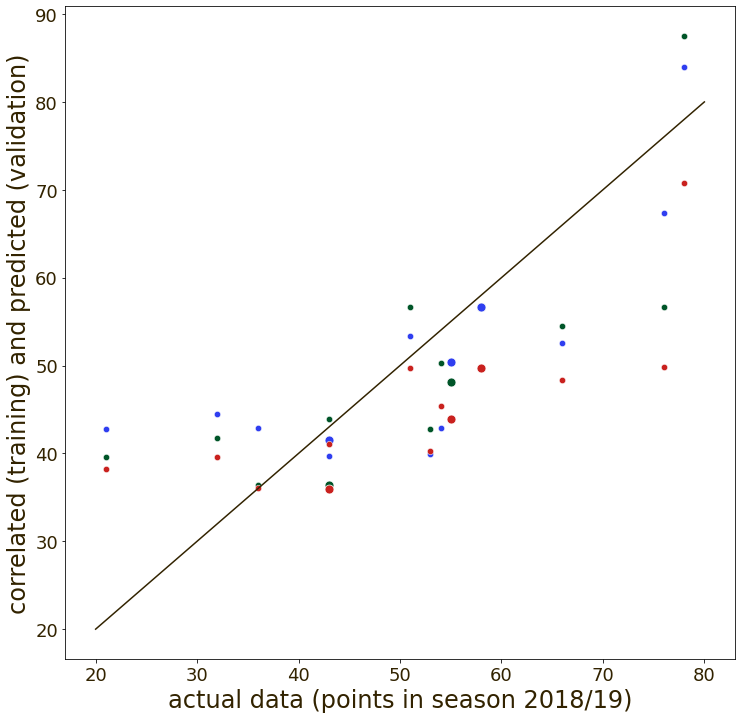

In [81]:
# Visualize actual vs. correlated data for the training data sets,
# and actual vs. predicted data for the validation data sets
#
import seaborn as sbn
import matplotlib.pyplot as plt

x_training_dataset = [[points_2017_18[club], relative_balance_2017_18[club]] for club in training]
x_val_dataset = [[points_2017_18[club], relative_balance_2017_18[club]] for club in validation]
x_test_dataset = [[points_2017_18[club], relative_balance_2017_18[club]] for club in test]

y_training_dataset = [points_2018_19[club] for club in training]
y_val_dataset = [points_2018_19[club] for club in validation]
y_test_dataset = [points_2018_19[club] for club in test]  # not shown here, but below

y_training_correlation_I = [model_I(model_I_coeff, x) for x in x_training_dataset]
y_training_correlation_II = [model_II(model_II_coeff, x) for x in x_training_dataset]
y_training_correlation_III = [model_III(model_III_coeff, x) for x in x_training_dataset]
y_val_prediction_I = [model_I(model_I_coeff, x) for x in x_val_dataset]
y_val_prediction_II = [model_II(model_II_coeff, x) for x in x_val_dataset]
y_val_prediction_III = [model_III(model_III_coeff, x) for x in x_val_dataset]
y_test_prediction_II = [model_II(model_II_coeff, x) for x in x_test_dataset]  # not shown here, but below

fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("actual data (points in season 2018/19)", fontsize=24, color="#322300")
ax.set_ylabel("correlated (training) and predicted (validation)",\
              fontsize=24, color="#322300")

# black for the x=y diagonal, representing perfect agreement
#
sbn.lineplot(x=[20, 80], y=[20, 80], color='#322300', ax=ax)

# green for model I
#
sbn.scatterplot(x=y_training_dataset, \
                y=y_training_correlation_I, color="#005528", s=40)
sbn.scatterplot(x=y_val_dataset, \
                y=y_val_prediction_I, color="#005528", s=80)

# light blue for model II
#
sbn.scatterplot(x=y_training_dataset, \
                y=y_training_correlation_II, color="#2f3ef0", s=40)
sbn.scatterplot(x=y_val_dataset, \
                y=y_val_prediction_II, color="#2f3ef0", s=80)

# red for model III
#
sbn.scatterplot(x=y_training_dataset, \
                y=y_training_correlation_III, color="#c9211e", s=40)
sbn.scatterplot(x=y_val_dataset, \
                y=y_val_prediction_III, color="#c9211e", s=80)

In [69]:
print("*** TEST OF MODEL II ***")

x_test_dataset = [[points_2017_18[club], relative_balance_2017_18[club]] for club in test]
y_test_dataset = [points_2018_19[club] for club in test]
print("\nx_test_dataset:\n", x_test_dataset)
print("\ny_test_dataset:\n", y_test_dataset)

rmsd = root_mean_square_deviation(x_test_dataset, y_test_dataset, model_II, model_II_coeff)
print("\nRoot mean square deviation between model II predictions and test data:\t", round(rmsd, 1))
print("Double root mean square deviation for indicating the margin of error:\t+-", round(2*rmsd, 1))

*** TEST OF MODEL II ***

x_test_dataset:
 [[63, 0.07790806607306079], [51, 0.03722091079681195], [33, 0.07645613305731704]]

y_test_dataset:
 [33, 28, 55]

Root mean square deviation between model II predictions and test data:	 15.7
Double root mean square deviation for indicating the margin of error:	+- 31.4


<AxesSubplot:xlabel='actual data (points in season 2018/19)', ylabel='correlated (training) and predicted (validation/test)'>

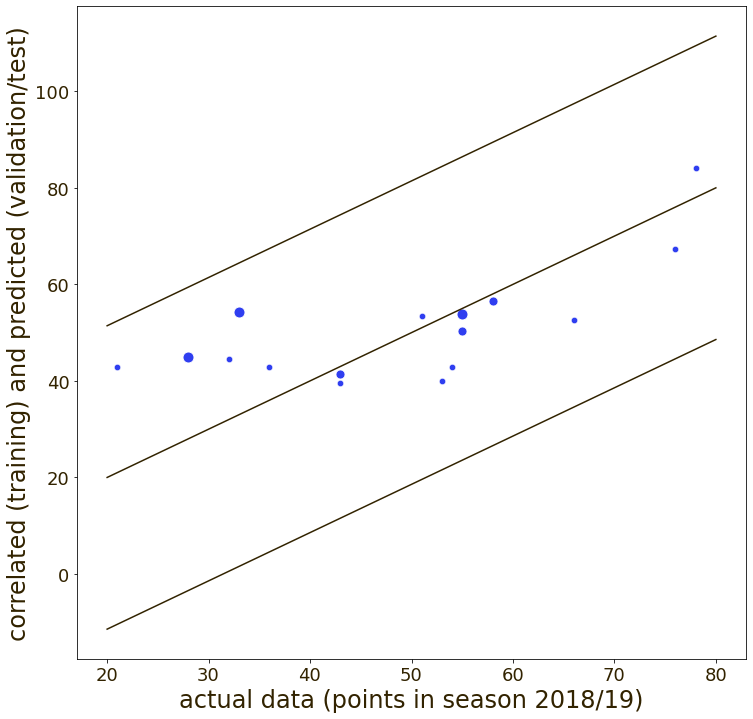

In [84]:
# Visualize actual vs. correlated data for the training data sets,
# and actual vs. predicted data for the validation and test data sets
#
import seaborn as sbn
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("actual data (points in season 2018/19)", fontsize=24, color="#322300")
ax.set_ylabel("correlated (training) and predicted (validation/test)",\
              fontsize=24, color="#322300")

# black for the x=y diagonal, representing perfect agreement
#
sbn.lineplot(x=[20, 80], y=[20, 80], color='#322300', ax=ax)

# light blue for model II
#
sbn.scatterplot(x=y_training_dataset, \
                y=y_training_correlation_II, color="#2f3ef0", s=40)
sbn.scatterplot(x=y_val_dataset, \
                y=y_val_prediction_II, color="#2f3ef0", s=80)
sbn.scatterplot(x=y_test_dataset, \
                y=y_test_prediction_II, color="#2f3ef0", s=120)

# diagonal transposed by margin of error of the correlation
#
sbn.lineplot(x=[20, 80], y=[20 - 2*rmsd, 80 - 2*rmsd], color='#322300', ax=ax)
sbn.lineplot(x=[20, 80], y=[20 + 2*rmsd, 80 + 2*rmsd], color='#322300', ax=ax)


<AxesSubplot:xlabel='fraction of total funds in season 2017/18', ylabel='points in season 2018/19'>

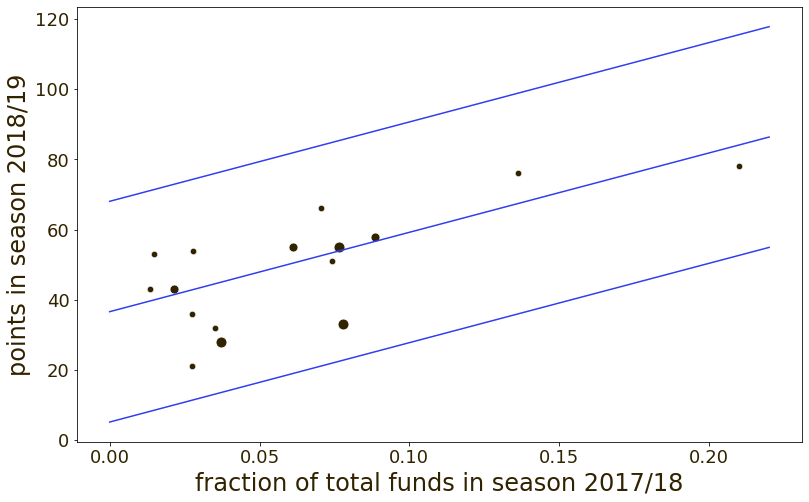

In [89]:
# Display model II with margin of error
#
import seaborn as sbn
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("fraction of total funds in season 2017/18", fontsize=24, color="#322300")
ax.set_ylabel("points in season 2018/19", fontsize=24, color="#322300")

sbn.scatterplot(x=[relative_balance_2017_18[club] for club in training], \
                y=[points_2018_19[club] for club in training], color="#322300", s=40)  # training data
sbn.scatterplot(x=[relative_balance_2017_18[club] for club in validation], \
                y=[points_2018_19[club] for club in validation], color="#322300", s=80)  # validation data
sbn.scatterplot(x=[relative_balance_2017_18[club] for club in test], \
                y=[points_2018_19[club] for club in test], color="#322300", s=120)  # test data

plot_range = np.arange(0, 0.23, 0.01)
model_II_plot = [model_II(model_II_coeff, [0, x1]) for x1 in plot_range]
model_II_plot_lower = [model_II(model_II_coeff, [0, x1]) - 2*rmsd for x1 in plot_range]
model_II_plot_upper = [model_II(model_II_coeff, [0, x1]) + 2*rmsd for x1 in plot_range]

sbn.lineplot(x=plot_range, y=model_II_plot, color='#2f3ef0', ax=ax)
sbn.lineplot(x=plot_range, y=model_II_plot_lower, color='#2f3ef0', ax=ax)
sbn.lineplot(x=plot_range, y=model_II_plot_upper, color='#2f3ef0', ax=ax)